# Plotting Sea Ice Index Using Remote Data

Here's a simple example of accessing Sea Ice Index data from NOAA@NSIDC using the python `pandas` package and plotting the September ice extent.  `pandas` will take a file path or a URL. 

> Valid URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is expected. A local file could be: file://localhost/path/to/table.csv.

The advantage here is that accessing data directly from NOAA@NSIDC ensures that it is up-to-date.  If you were following the download model, each time you want to make a new plot, you would have to download the data to ensure that the file is the more recent file available.

In addition to plotting the September extent, we can add the regression line.  We use `sklearn.linear_model.LinearRegression` to do this.

## A simple Remote Access Workflow

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

### Loading the data

We use `pandas.read_csv` method to access the data and load it directly into memory.  One _wrinkle_ is that, while the file extension suggests the data a CSV, they are in fact a hybrid of fixed-width and CSV; values are separated by both commas and whitespace.  To deal with this, we set the `skipinitialwhitespace` keyword to True.

See **Making Sea Ice Index Data Interoperable and Reusable** for more information.

In [2]:
%%time

url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/N_09_extent_v3.0.csv"

df = pd.read_csv(url, index_col="year", skipinitialspace=True)
df.head()

CPU times: user 12 ms, sys: 4.14 ms, total: 16.1 ms
Wall time: 3.76 s


,mo,data-type,region,extent,area
year,,,,,
1979,9,Goddard,N,7.05,4.58
1980,9,Goddard,N,7.67,4.87
1981,9,Goddard,N,7.14,4.44
1982,9,Goddard,N,7.30,4.43
1983,9,Goddard,N,7.39,4.70


### Make a plot

Accessing the data remote takes a few seconds - the file is small.  We can then get on with the analysis, in this case plotting the data and calculating the regression line.

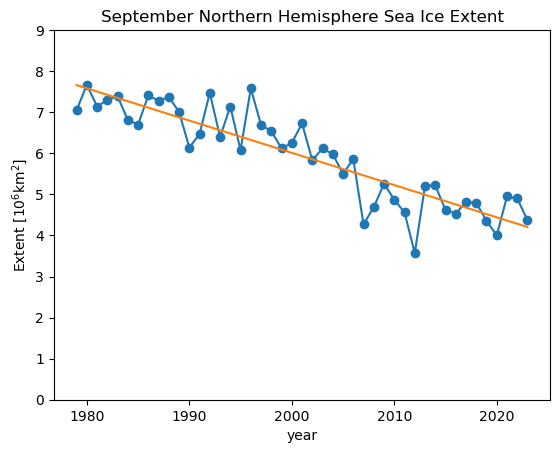

In [3]:
x = df.extent.index.values.reshape(-1,1)
y = df.extent.values
model = LinearRegression().fit(x, y)
yhat = model.predict(x)

ax = df["extent"].plot(marker='o', 
                       ylim=(0.,9.), ylabel="Extent [$10^6 \\mathrm{km}^2$]", 
                       title="September Northern Hemisphere Sea Ice Extent")
ax.plot(x, yhat)


## Making Sea Ice Index Data Interoperable and Reusable

As noted above, one _wrinkle_ with the Sea Ice Index data used here is that, while the file extension suggests the data a CSV, they are in fact a hybrid of fixed-width and CSV; values are separated by both commas and whitespace.

```
year, mo,    data-type, region, extent,   area
1979,  9,      Goddard,      N,   7.05,   4.58
1980,  9,      Goddard,      N,   7.67,   4.87
1981,  9,      Goddard,      N,   7.14,   4.44
1982,  9,      Goddard,      N,   7.30,   4.43
1983,  9,      Goddard,      N,   7.39,   4.70
```

If we assume the file is a standard CSV with a single character delimiter, which is generally expected for a csv, then column headings have whitespace.

```
df = pd.read_csv(url, index_col="year")
df.columns
```
```
Index([' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')
```

This can be easily fixed by setting the `skipinitialwhitespace` keyword to True but users need to be aware of this problem.

While there is no standard for CSV files, most CSV readers expect the file to have a single delimiiter character and no spaces.  This is less readable for a human but makes the data more interoperable.

This is better.
```
year,mo,data-type,region,extent,area
1979,9,Goddard,N,7.05,4.58
1980,9,Goddard,N,7.67,4.87
1981,9,Goddard,N,7.14,4.44
1982,9,Goddard,N,7.30,4.43
1983,9,Goddard,N,7.39,4.70
```
